In [41]:
import importlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


eda_dpp_utils = importlib.import_module('eda_dpp_utils')
feature_eng_utils = importlib.import_module('feature_eng_utils')

importlib.reload(eda_dpp_utils)
importlib.reload(feature_eng_utils)

<module 'feature_eng_utils' from '/Users/shardulankurnewasker/Desktop/actlcompsci/y2/t3/comp9417/forecasting_air_pollution/feature_eng_utils.py'>

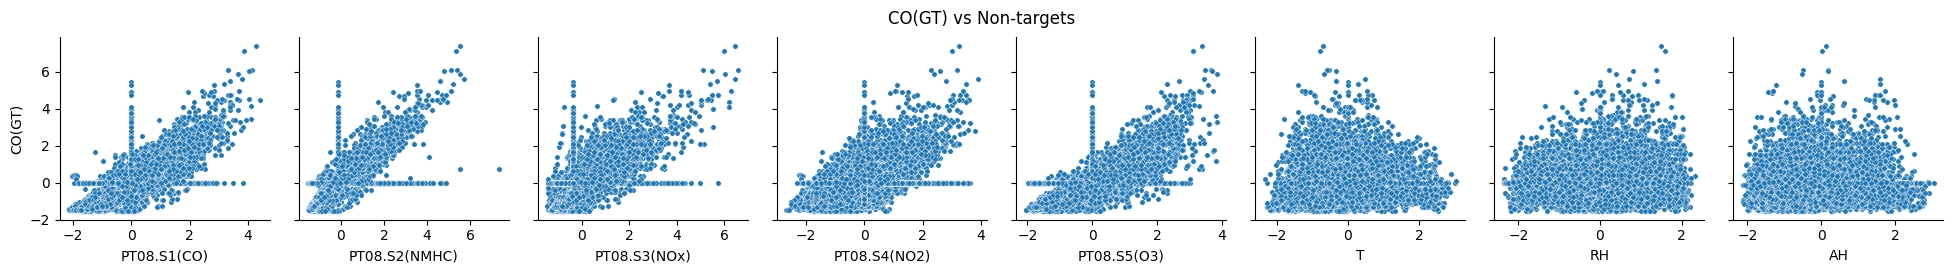

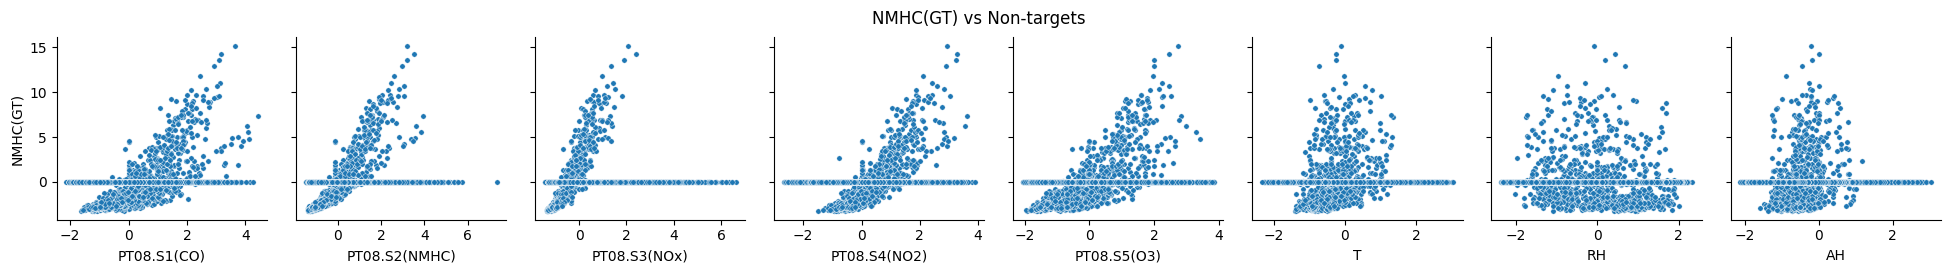

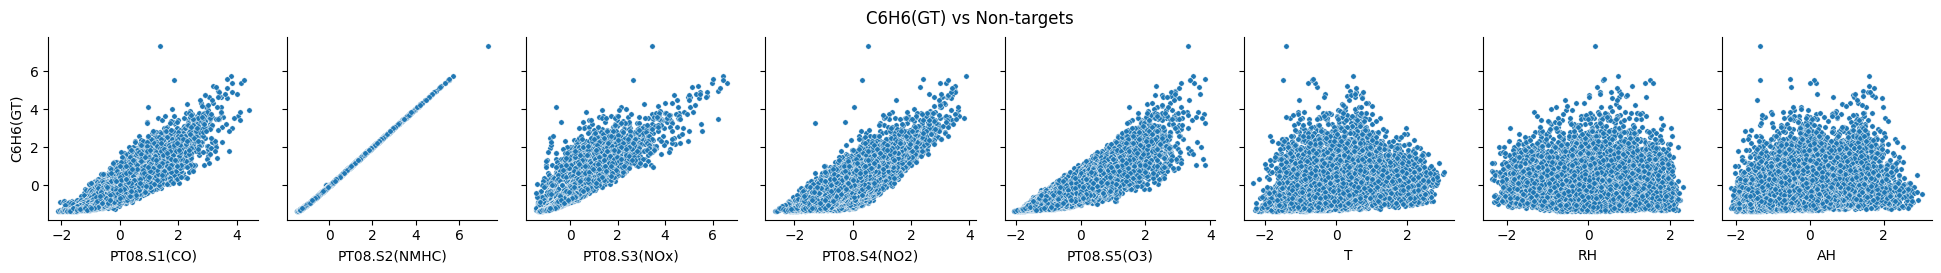

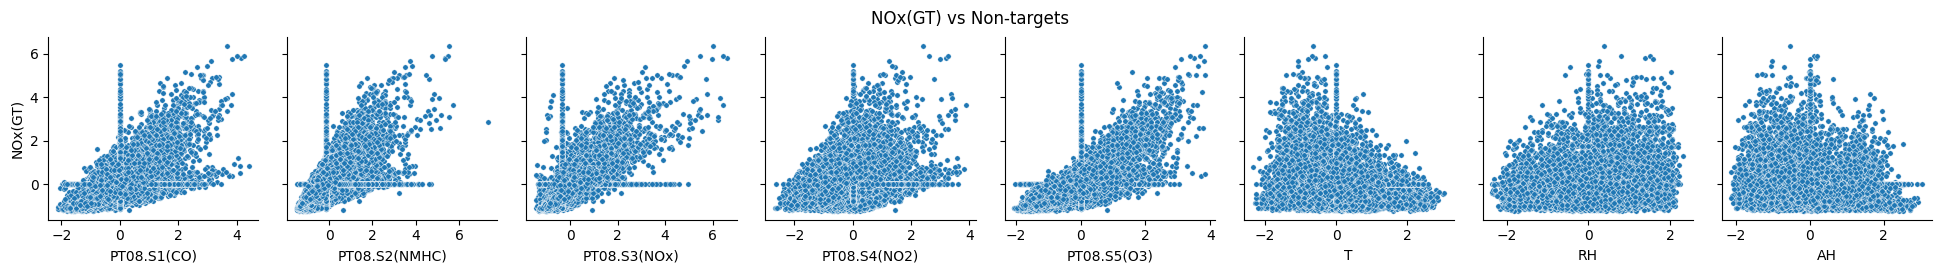

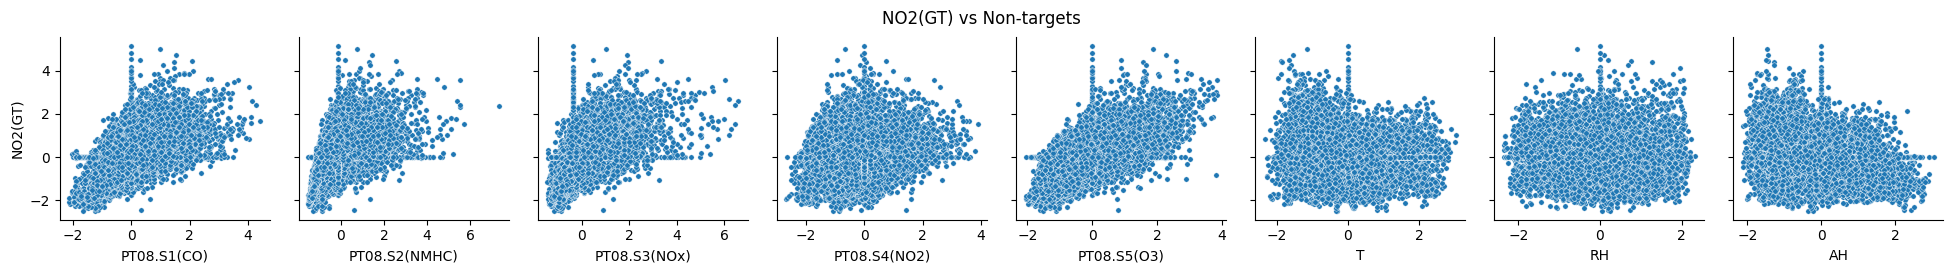

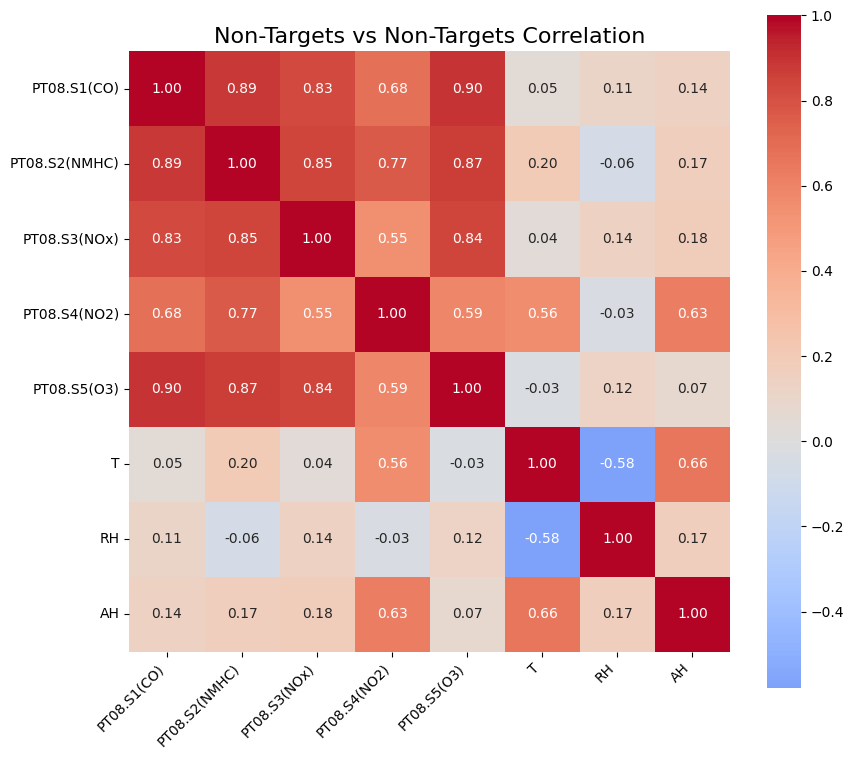

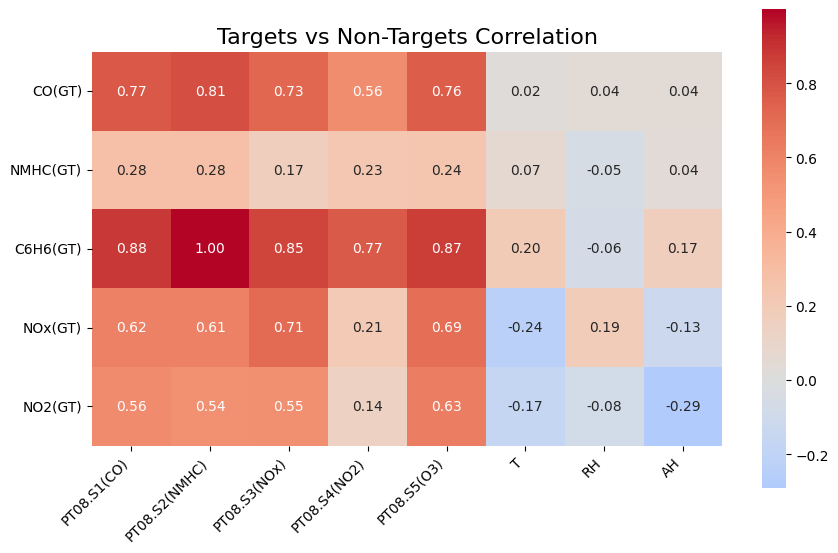

"\nNote: T,RH,AH are weakly correlated and can't find a feature transform to improve correlation.\n"

In [44]:

df, df_unnormalised, numeric_cols, df_unclean = eda_dpp_utils.preProcessing()
scaler = StandardScaler()
df = df_unnormalised
x = 'PT08.S3(NOx)'
df[x] = 1/((df[x] + 1e-6)**2)
x = 'PT08.S2(NMHC)'
df[x] = (df[x]**2)

df = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)
targets = [c for c in df.columns if '(GT)' in c].copy()
eda_dpp_utils.scatter_targetNontarget(df)
eda_dpp_utils.corrHeatmaps(df, targets)

"""
Note: T,RH,AH are weakly correlated and can't find a feature transform to improve correlation.
"""

      target        feature  correlation
0     CO(GT)     CO(GT)_MA1     1.000000
1     CO(GT)     CO(GT)_MA7     0.650362
2     CO(GT)    CO(GT)_MA24     0.468369
3     CO(GT)    CO(GT)_lag1     0.813848
4     CO(GT)    CO(GT)_lag2     0.586973
5     CO(GT)    CO(GT)_lag3     0.418473
6   NMHC(GT)   NMHC(GT)_MA1     1.000000
7   NMHC(GT)   NMHC(GT)_MA7     0.582514
8   NMHC(GT)  NMHC(GT)_MA24     0.385826
9   NMHC(GT)  NMHC(GT)_lag1     0.771258
10  NMHC(GT)  NMHC(GT)_lag2     0.479108
11  NMHC(GT)  NMHC(GT)_lag3     0.282592
12  C6H6(GT)   C6H6(GT)_MA1     1.000000
13  C6H6(GT)   C6H6(GT)_MA7     0.657914
14  C6H6(GT)  C6H6(GT)_MA24     0.479463
15  C6H6(GT)  C6H6(GT)_lag1     0.836395
16  C6H6(GT)  C6H6(GT)_lag2     0.610979
17  C6H6(GT)  C6H6(GT)_lag3     0.433732
18   NOx(GT)    NOx(GT)_MA1     1.000000
19   NOx(GT)    NOx(GT)_MA7     0.779425
20   NOx(GT)   NOx(GT)_MA24     0.661901
21   NOx(GT)   NOx(GT)_lag1     0.874734
22   NOx(GT)   NOx(GT)_lag2     0.744236
23   NOx(GT)   N

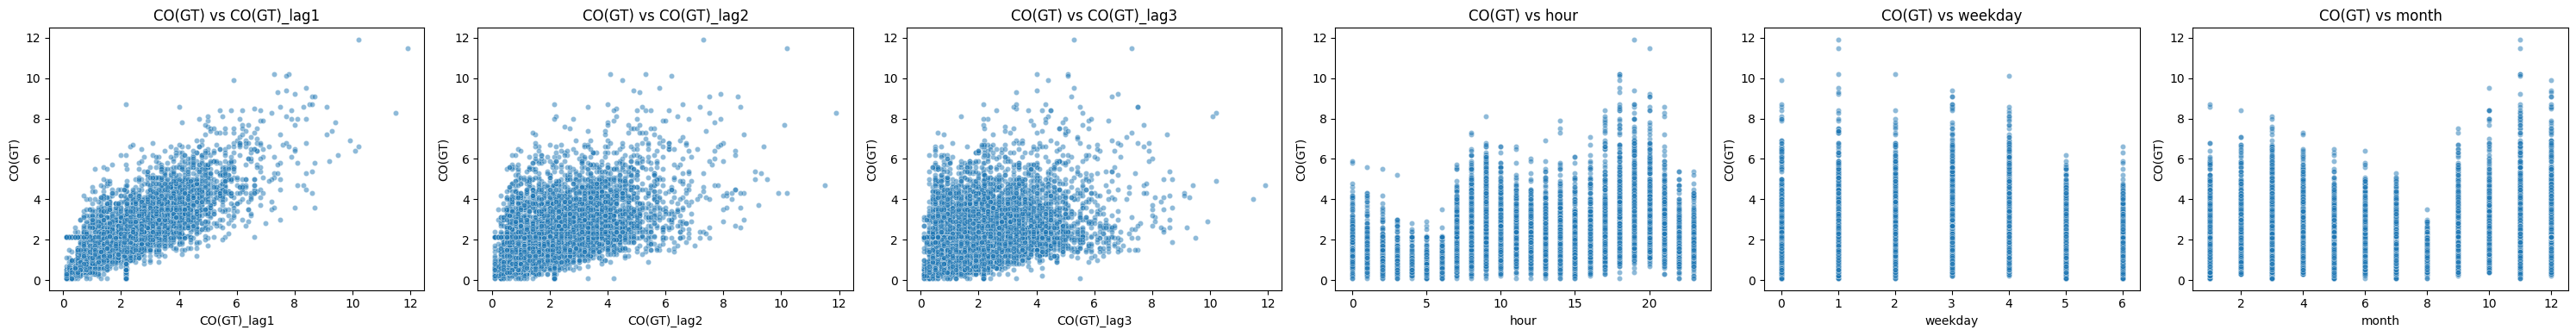

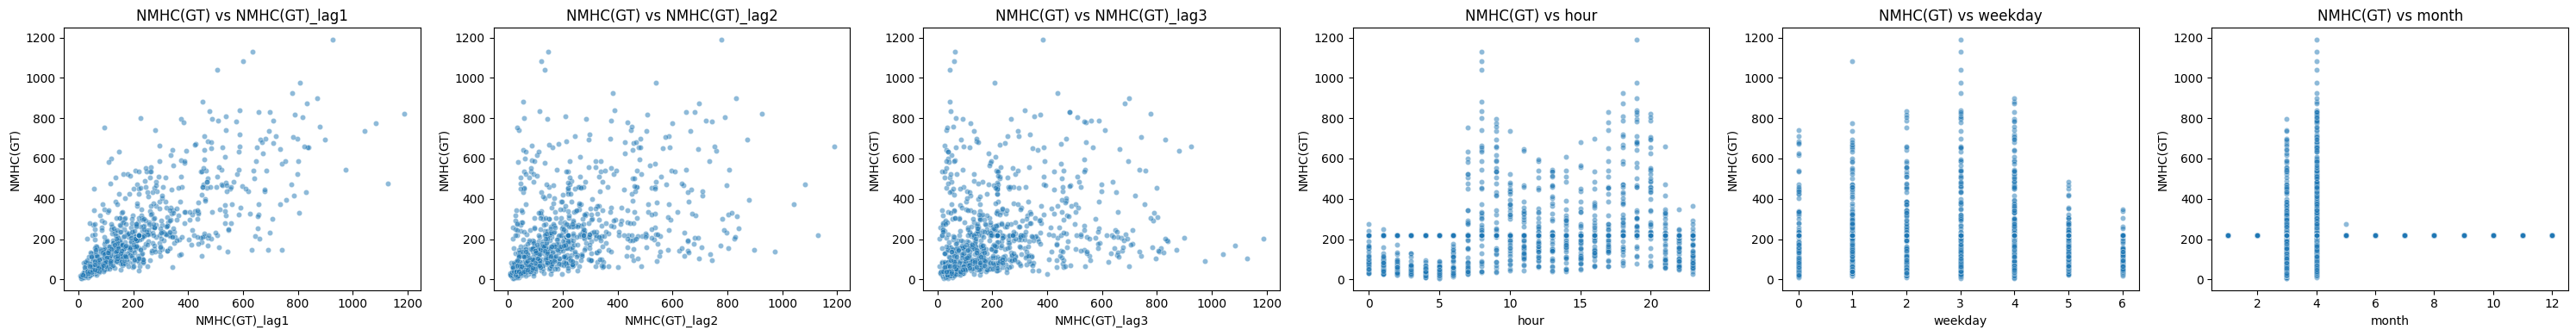

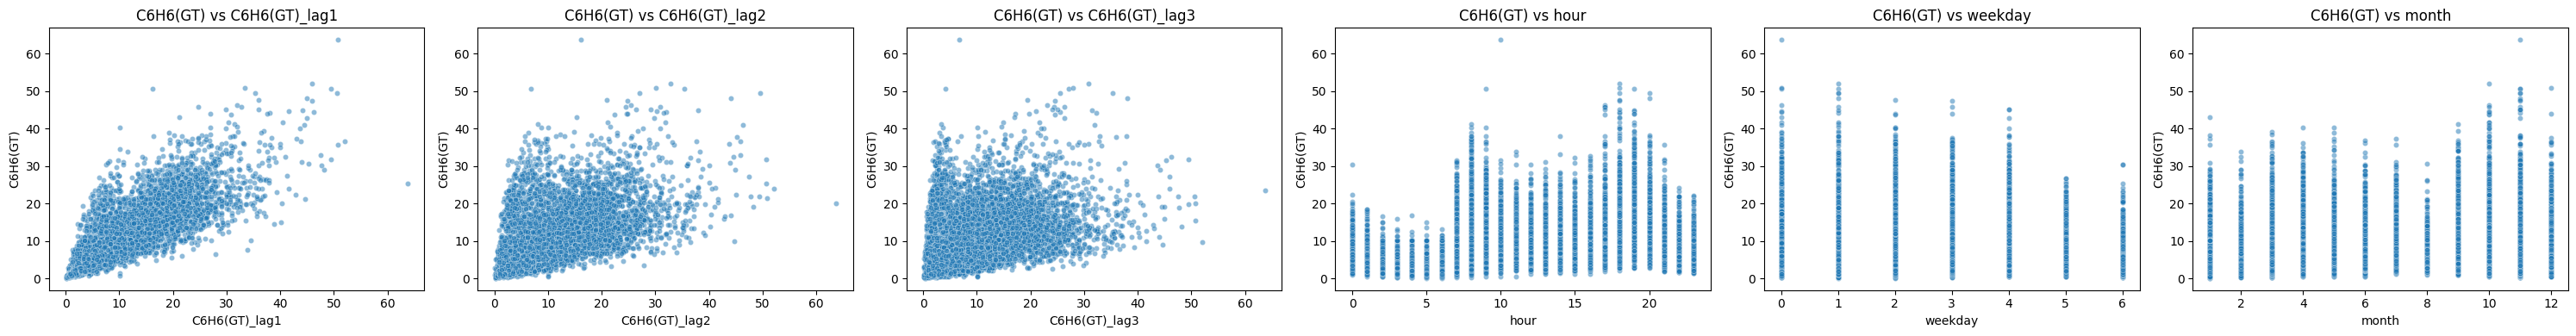

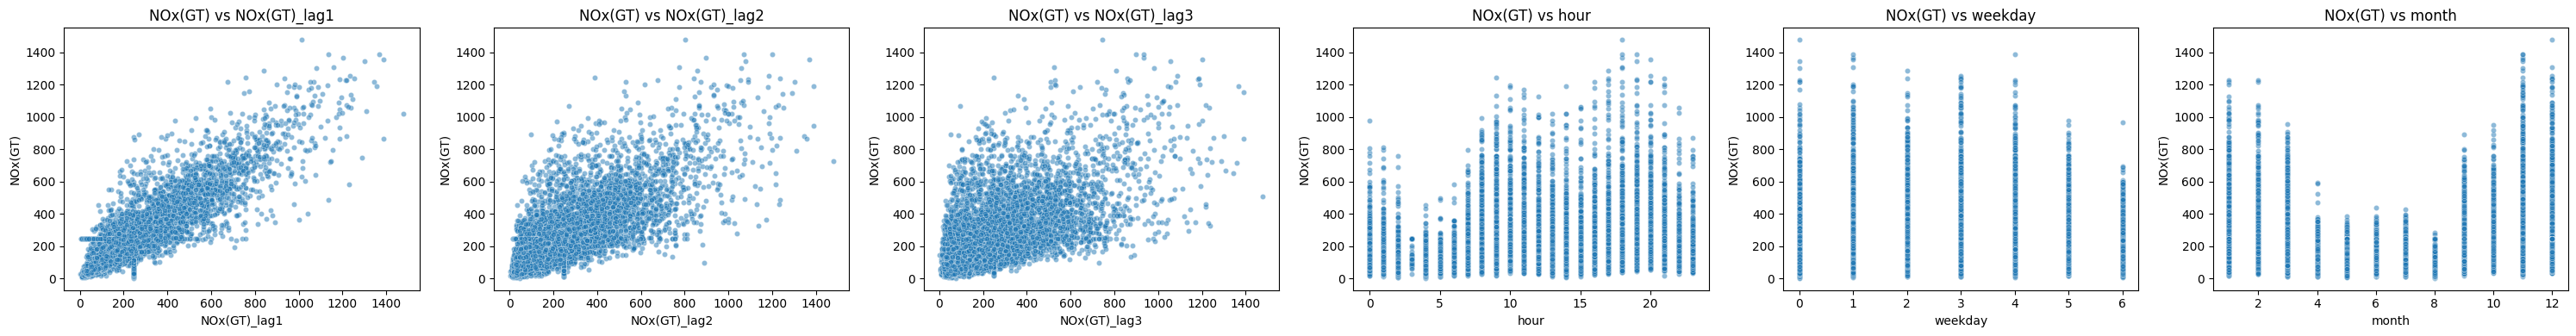

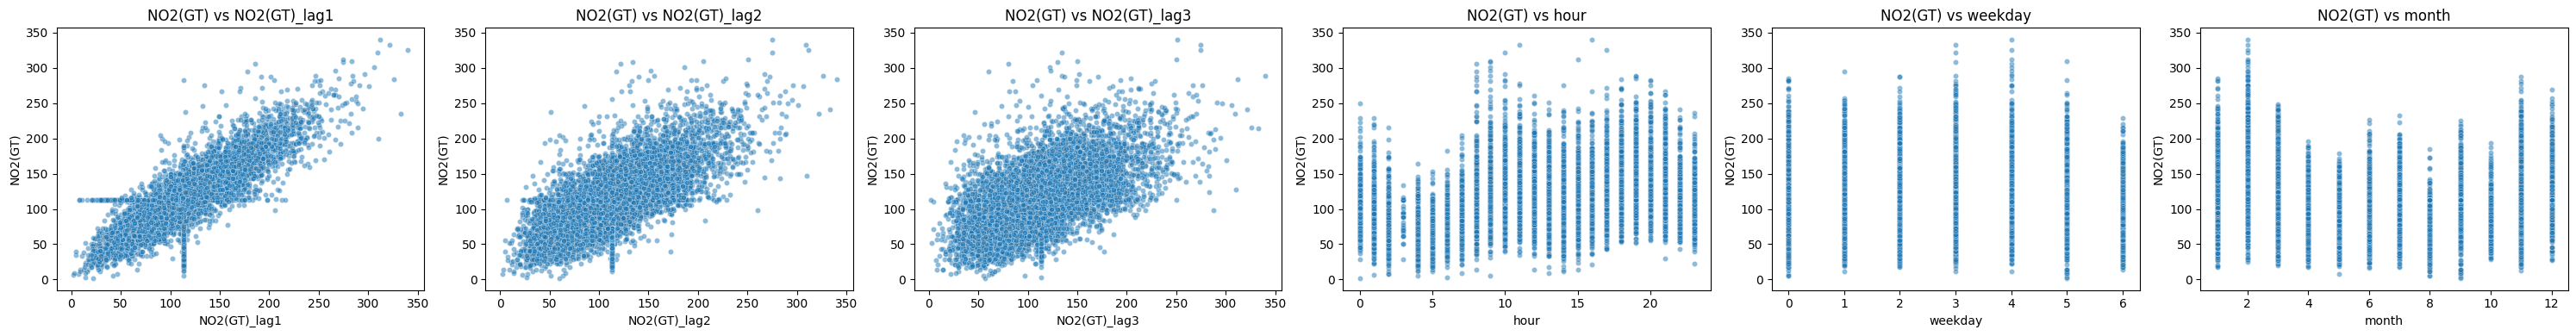

'\nNotes: keep lag 1, since daily avg is moderate correlation\nhour, weekday, month have good cyclical relationship with targets. Could do 1 hot encoding on them\n'

In [35]:
# Lagged variables and time features
df, df_unnormalised, numeric_cols, df_unclean = eda_dpp_utils.preProcessing()

windows = [1, 7, 24]
lags = [1, 2, 3]
original_targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# Add MA and lag features
df = feature_eng_utils.addMovingAverages(df_unnormalised, windows, original_targets)
df = feature_eng_utils.addLagFeatures(df_unnormalised, lags, original_targets)

corr_df = feature_eng_utils.LagMACorrelations(df, original_targets)
print(corr_df)
feature_eng_utils.plot_lag_and_time_scatter(df, original_targets, lags)
"""
Notes: keep lag 1, since daily avg is moderate correlation
hour, weekday, month have good cyclical relationship with targets. Could do 1 hot encoding on them
"""

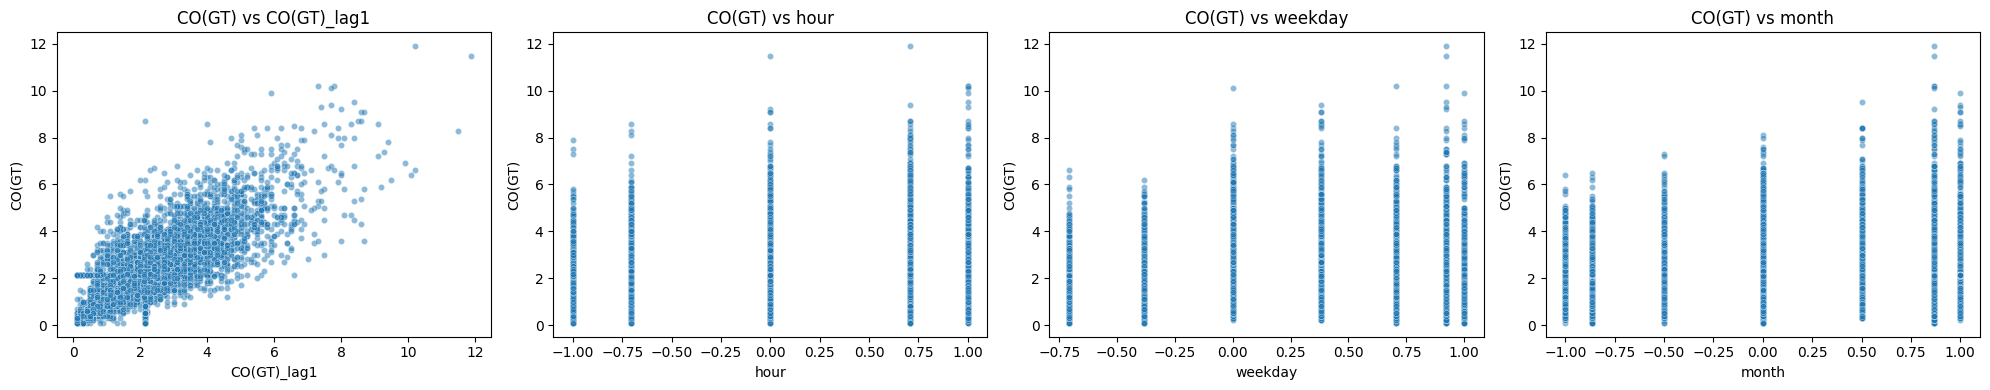

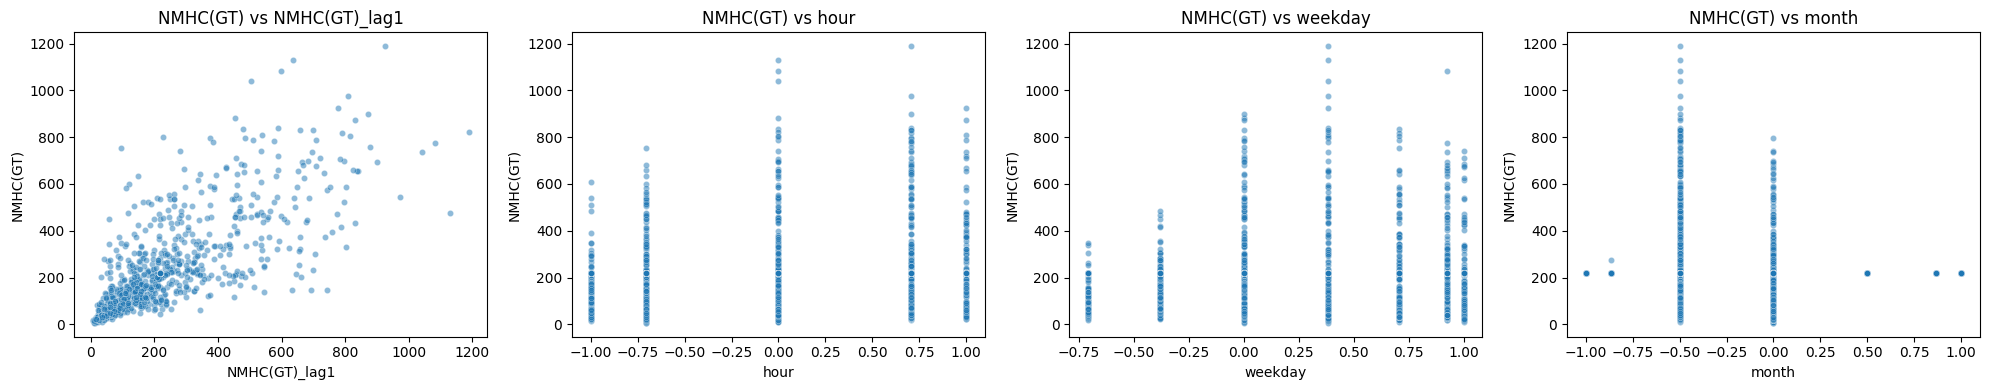

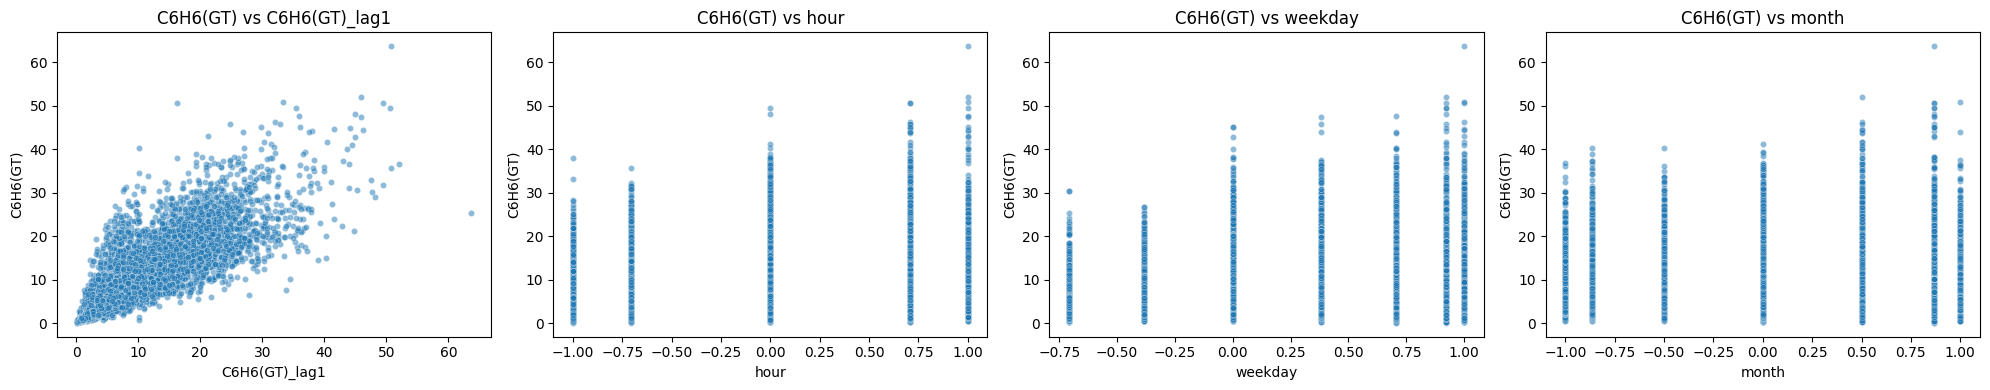

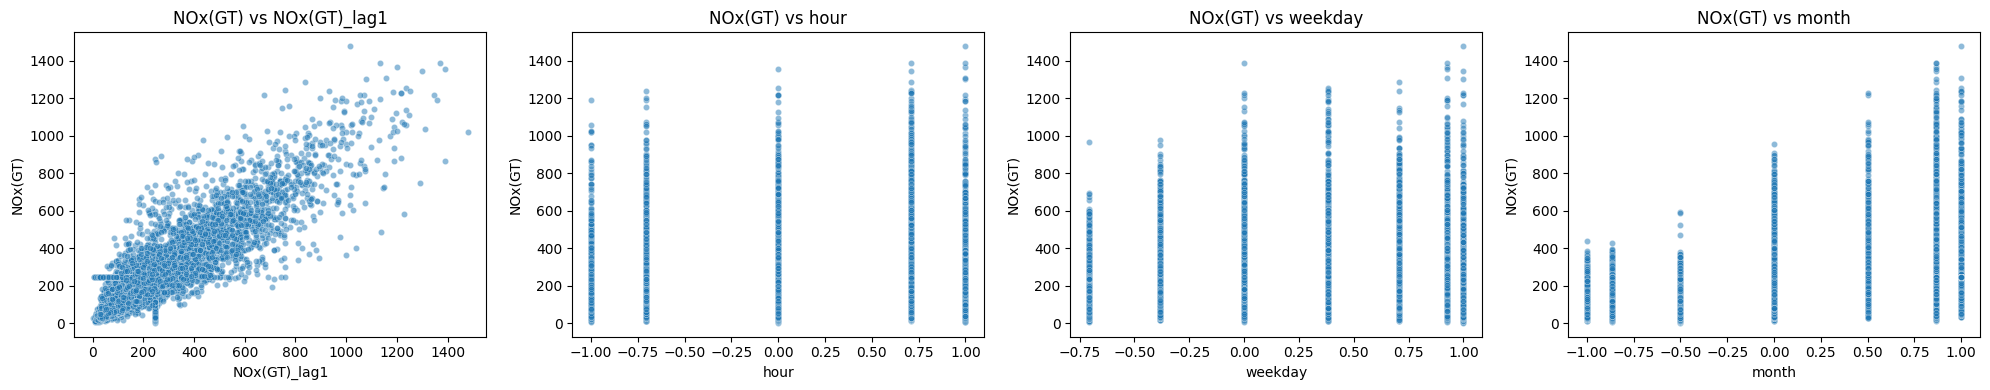

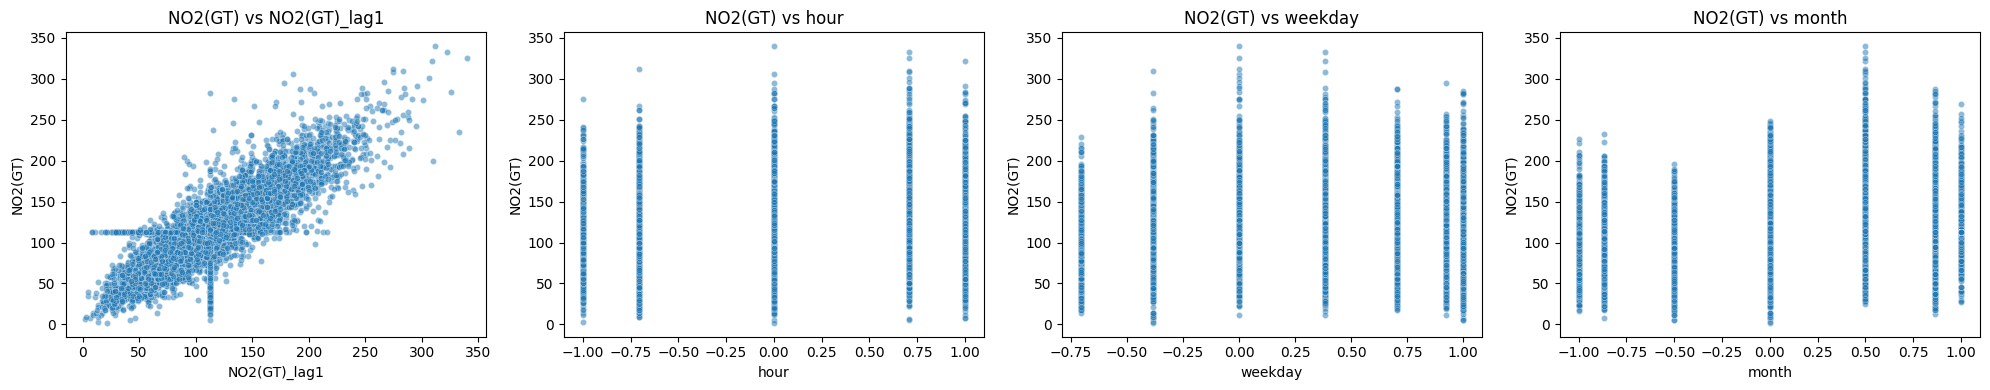

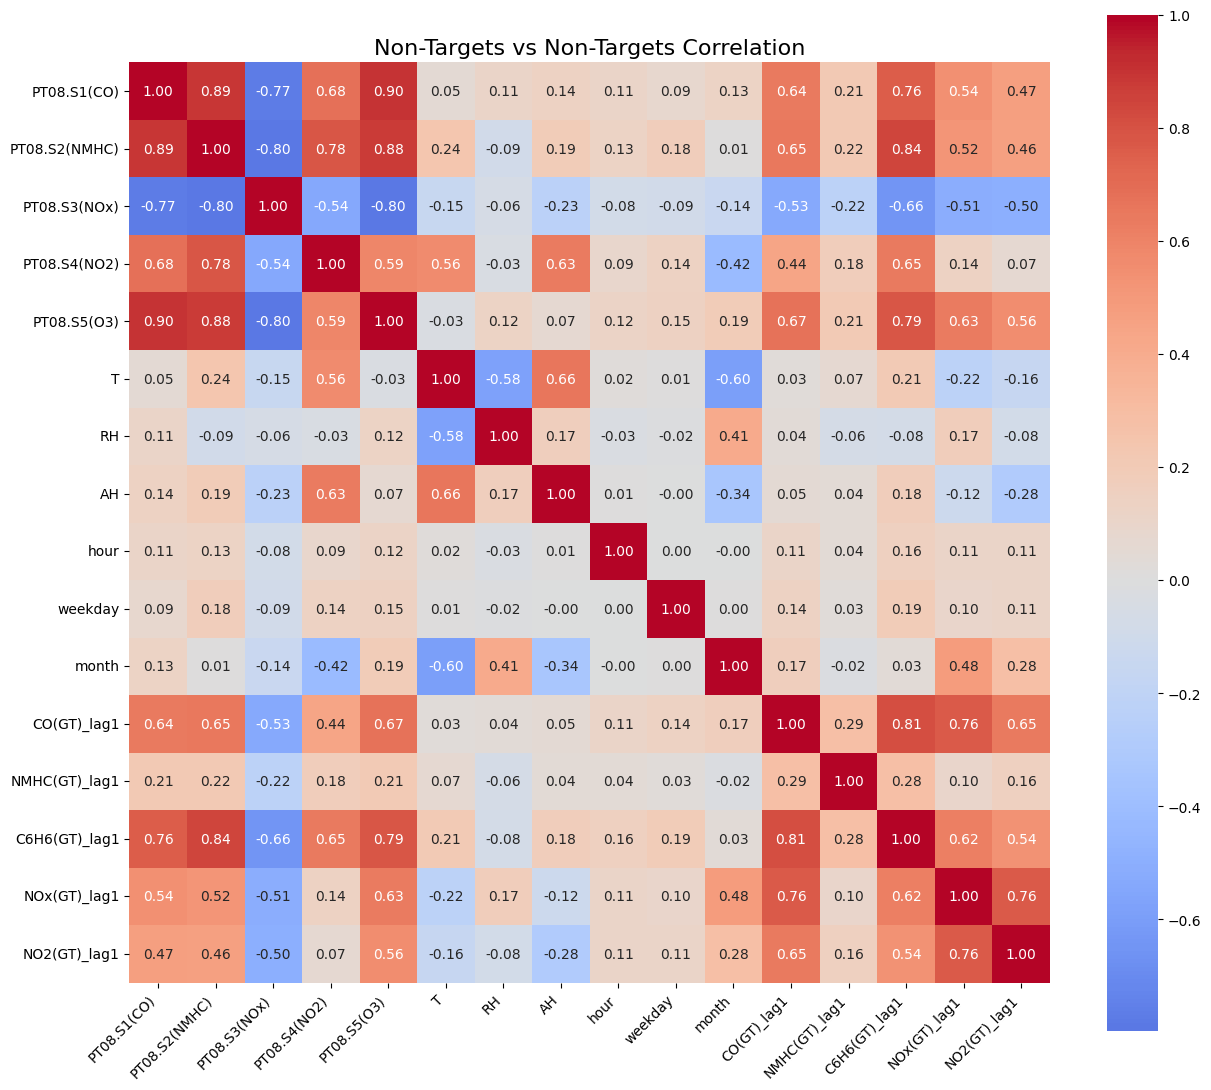

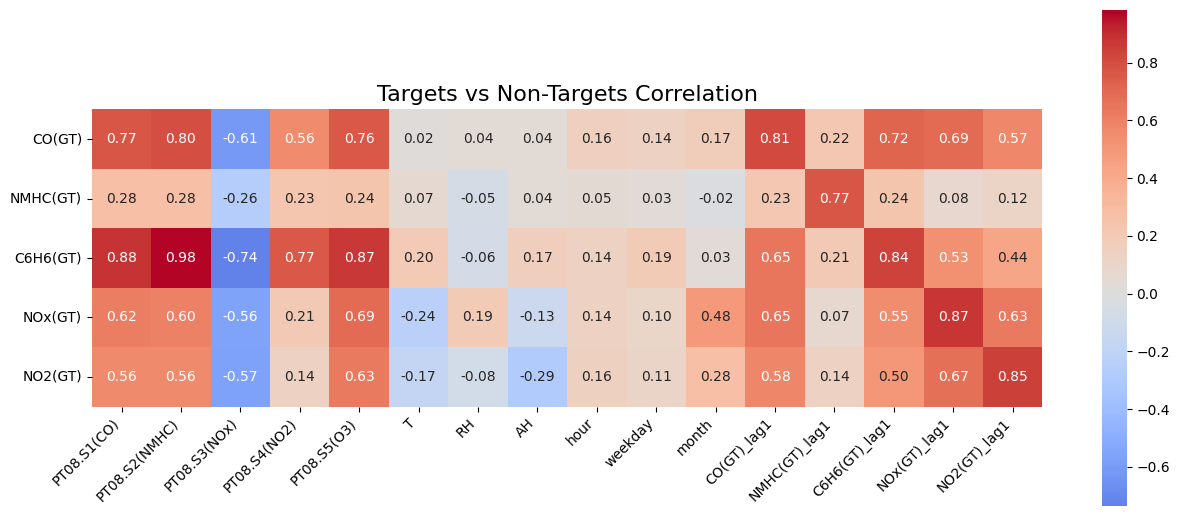

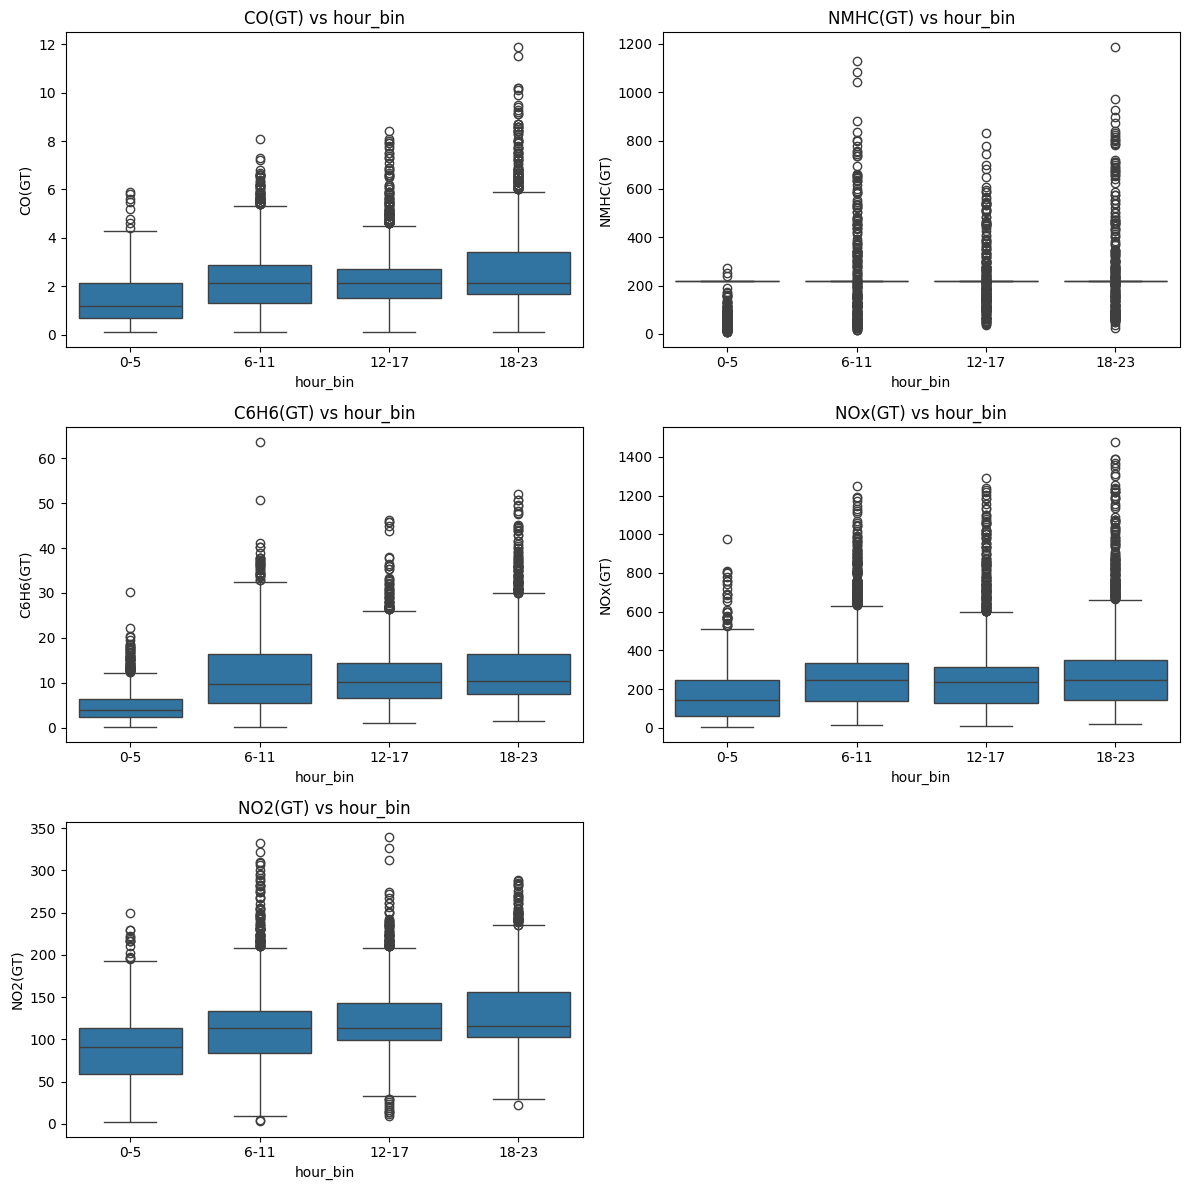

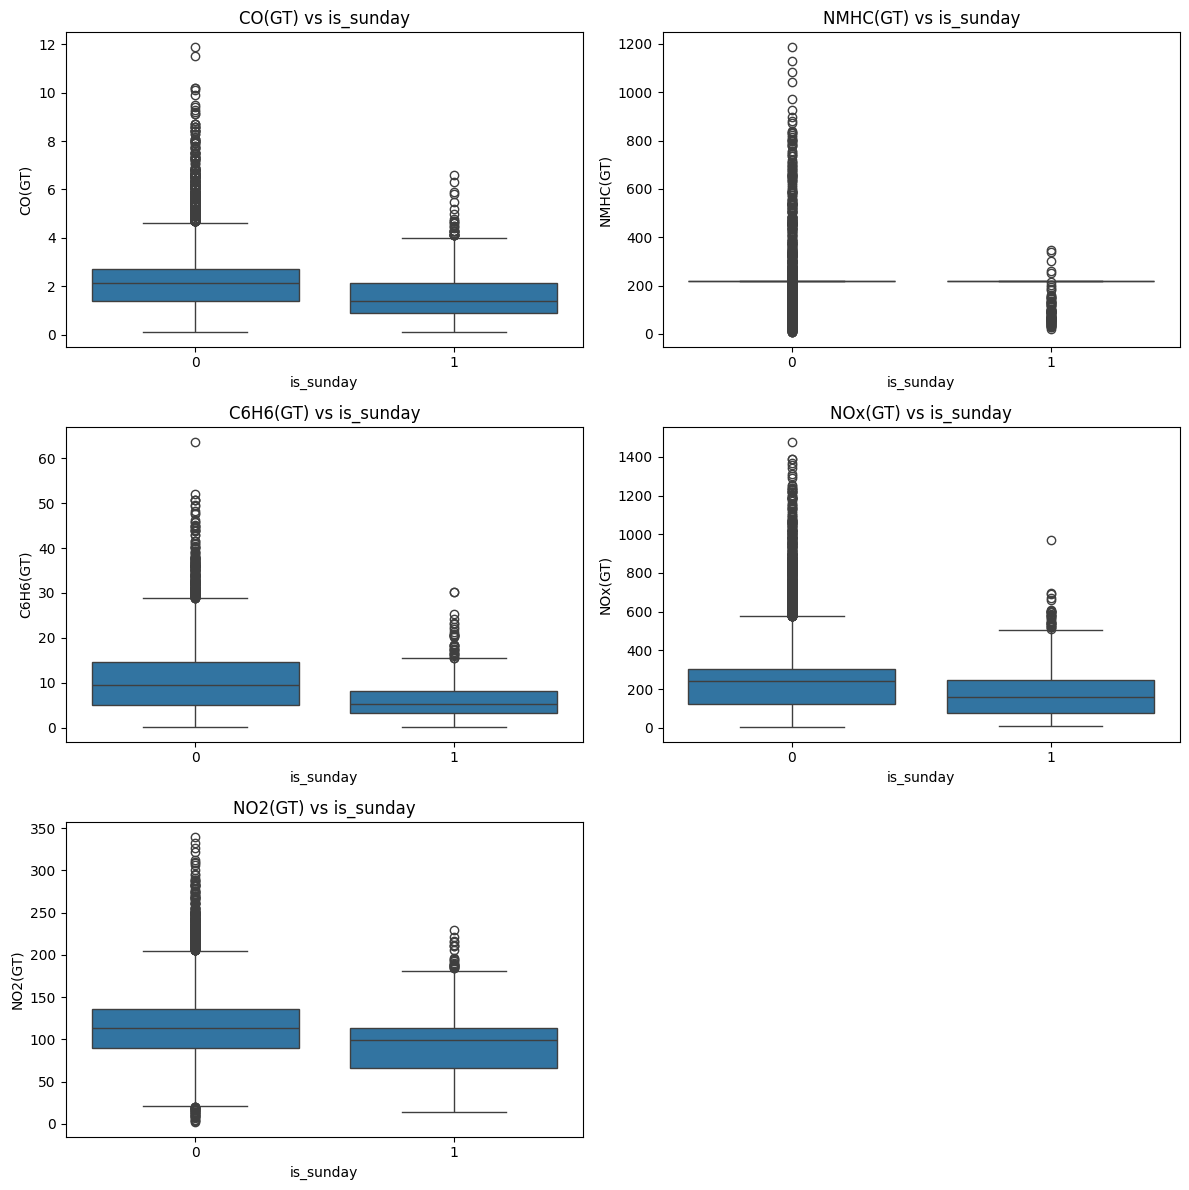

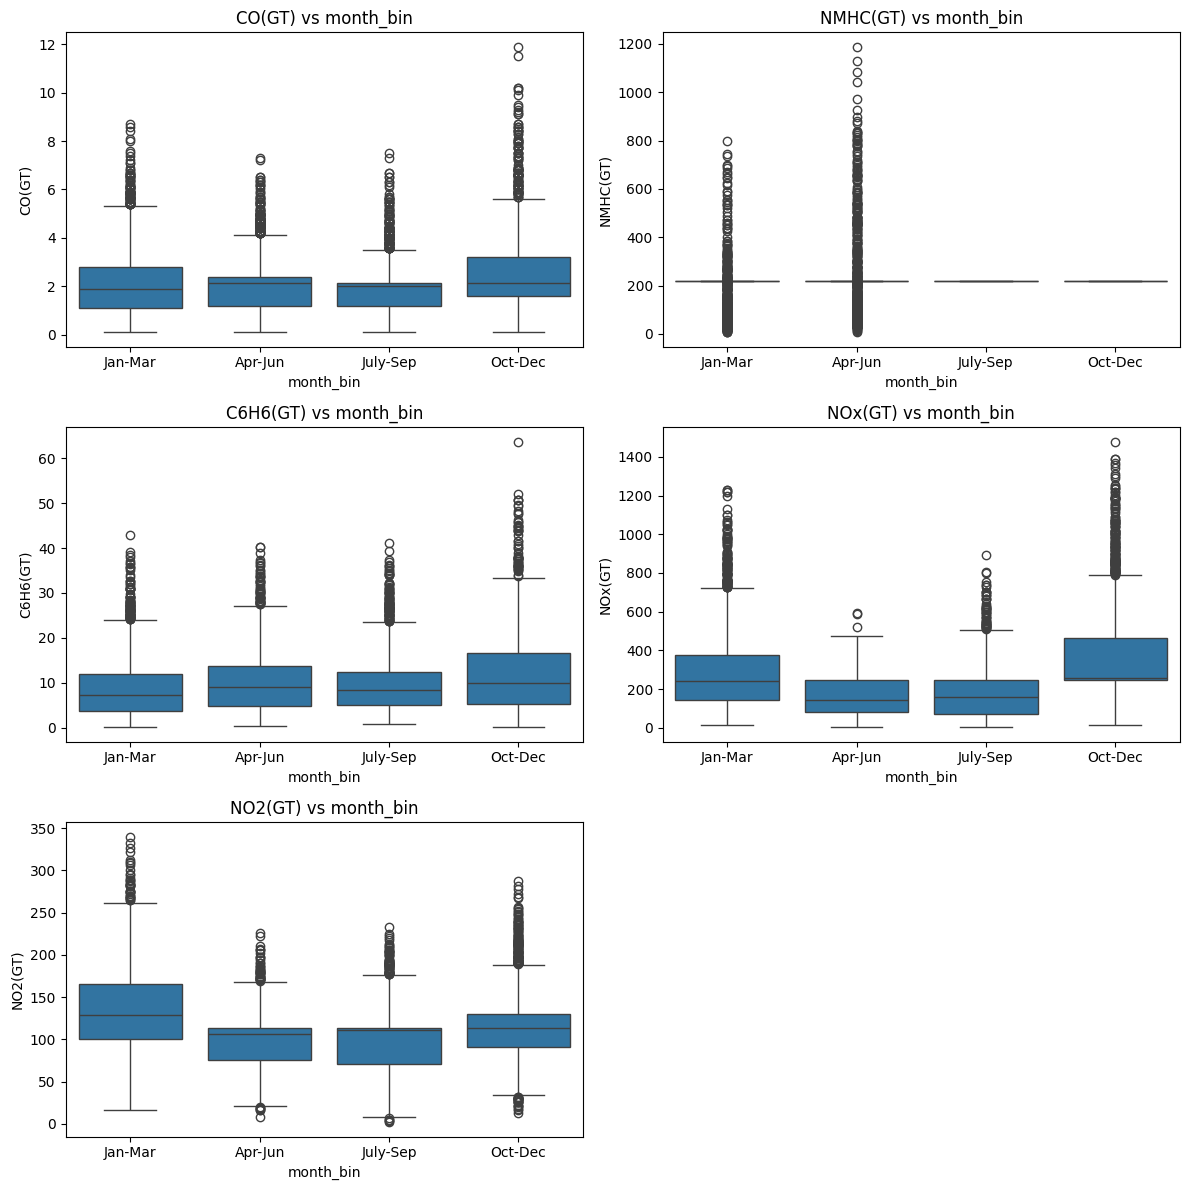

                              correlation
feature            target                
hour_bin_0-5       CO(GT)   -3.337011e-01
                   NMHC(GT) -1.367957e-01
                   C6H6(GT) -4.200231e-01
                   NOx(GT)  -2.593564e-01
                   NO2(GT)  -3.375878e-01
hour_bin_6-11      CO(GT)    2.799121e-02
                   NMHC(GT)  4.390280e-02
                   C6H6(GT)  1.092462e-01
                   NOx(GT)   9.379251e-02
                   NO2(GT)   7.628450e-03
hour_bin_12-17     CO(GT)    4.434119e-02
                   NMHC(GT)  2.541822e-02
                   C6H6(GT)  8.764374e-02
                   NOx(GT)   4.132844e-02
                   NO2(GT)   1.093433e-01
hour_bin_18-23     CO(GT)    2.613877e-01
                   NMHC(GT)  6.748551e-02
                   C6H6(GT)  2.231707e-01
                   NOx(GT)   1.242531e-01
                   NO2(GT)   2.206628e-01
is_sunday          CO(GT)   -1.817028e-01
                   NMHC(GT) -5.482

In [37]:
# cyclical transform (its still cyclic after transforming)
df, df_unnormalised, numeric_cols, df_unclean = eda_dpp_utils.preProcessing()
targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
df = feature_eng_utils.addLagFeatures(df_unnormalised, [1], targets) # pi * 4,8,6
df['hour'] = np.sin(np.pi * df['hour'] / 4)
df['weekday'] = np.cos(np.pi * df['weekday'] / 8)
df['month'] = np.cos(np.pi * df['month'] / 6)
feature_eng_utils.plot_lag_and_time_scatter(df, targets, [1])
eda_dpp_utils.corrHeatmaps(df, targets)

# bin the cyclic variables for linear model.
df, df_unnormalised, numeric_cols, df_unclean = eda_dpp_utils.preProcessing() 
df = feature_eng_utils.addLagFeatures(df_unnormalised, [1], targets)
df, binned_features = feature_eng_utils.bin_features(df)
targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

feature_eng_utils.plot_binned_features(df, targets, binned_features)
corr_df = feature_eng_utils.binned_correlation(df, targets, binned_features)
print(corr_df)